In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from scipy import stats
from scipy import spatial
import gaussian
import matplotlib.pyplot as plt

In [2]:
# Import training data

train = np.genfromtxt('data/trn_data.csv', delimiter=',',skip_header=True)
print train[:5], train.shape

[[  40.582 -119.79    84.929]
 [  41.983 -123.6     87.388]
 [  41.85  -123.97    36.259]
 [  42.07  -123.01    84.913]
 [  41.953 -121.58    66.445]] (414, 3)


In [3]:
# Import test data

test = np.genfromtxt('data/tst_locations.csv', delimiter=',',skip_header=True)
print test[:5], test.shape

[[  41.988 -123.72 ]
 [  41.883 -124.13 ]
 [  41.833 -123.83 ]
 [  41.999 -121.7  ]
 [  41.928 -122.44 ]] (413, 2)


In [4]:
# Create model object from training data

kriging = gaussian.SimpleKriging(training_data=train)

In [5]:
# Return prediction means for test data from trained model

predict = kriging.predict(test_data=test, l=.5, sigma=.2)
predict[:5]

array([[ 70.94340417],
       [ 23.70437824],
       [ 49.57131344],
       [ 71.06713418],
       [ 70.69029366]])

In [6]:
# Simulate

bounding_box = [38.3, 39.3, -120.0, -121.0]

simulate = kriging.simulate(bbox=bounding_box, ncells=50, l=.55, sigma=0.2, indices=True)

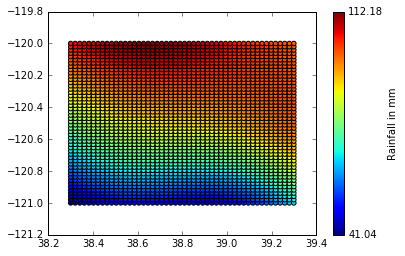

In [10]:
viz = kriging.simulate(bbox=bounding_box, ncells=50, l=.55, sigma=0.2, indices=True, show_visual=True)

In [9]:
viz

array([  66.66639277,   65.04907473,   63.37405449, ...,  107.14594819,
        106.35939162,  105.58229294])